## Importing relevant Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import metrics 
import itertools
from sklearn import svm
from sklearn import model_selection

## Read IDX file

In [1]:
import idx2numpy

### Convert file
specifying train and test features and target

In [3]:
train_images = idx2numpy.convert_from_file("train-images-idx3-ubyte")
train_label = idx2numpy.convert_from_file("train-labels-idx1-ubyte")

In [5]:
test_images = idx2numpy.convert_from_file("t10k-images-idx3-ubyte")
test_label = idx2numpy.convert_from_file("t10k-labels-idx1-ubyte")

In [7]:
train_images.shape

(60000, 28, 28)

### Reshape feautures
Reshape 2D array (28*28) to 1Darray (724)

In [9]:
train_samples = len(train_images)
x_train = train_images.reshape((train_samples,-1))
x_train.shape

(60000, 784)

In [11]:
test_samples = len(test_images)
x_test = test_images.reshape((test_samples , -1))
x_test.shape

(10000, 784)

## Scalling the data
Scale the features in range(-1,1) for making the model more accurate

In [14]:
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Classification Model SVM
Choosing the appropriate machine learning model based on the problem
initializing the SVM model with chosen hyperparameters for further testing

In [42]:
clf = svm.SVC(kernel = "rbf" , gamma = "scale" , C = 8)
clf.fit(x_train_scaled , train_label)

SVC(C=8)

## Testing and Evaluate model

In [18]:
test_label_hat = clf.predict(x_test_scaled)

#### Confusion matrix function

In [19]:
# confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.77      0.80      0.79      1000
           5       0.95      0.93      0.94      1000
           6       0.68      0.60      0.64      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.87     10000
weighted avg       0.86      0.87      0.87     10000

Confusion matrix, without normalization
[[840   1  11  42   4   2  87   0  13   0]
 [  3 958   5  27   3   0   3   0   1   0]
 [ 10   3 790  11 112   0  69   0   5   0]
 [ 27   6  12 886  32   0  34   0   3   0]
 [  0   1  90  31 802   0  74

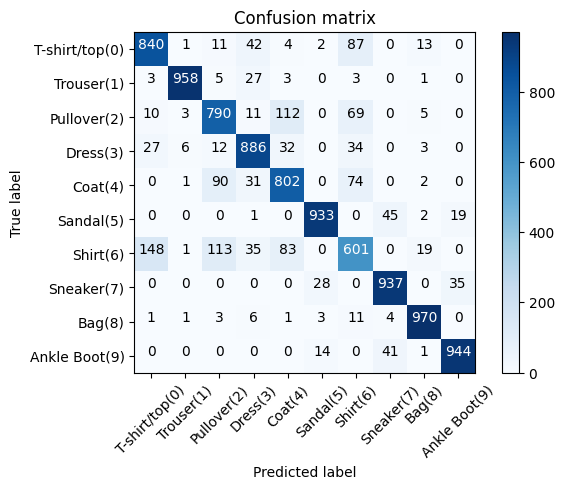

In [20]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(test_label, test_label_hat, labels=[0,1,2,3,4,5,6,7,8,9])
np.set_printoptions(precision=2)

print (metrics.classification_report(test_label, test_label_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['T-shirt/top(0)','Trouser(1)','Pullover(2)','Dress(3)','Coat(4)','Sandal(5)','Shirt(6)','Sneaker(7)','Bag(8)','Ankle Boot(9)'],normalize= False,  title='Confusion matrix')

## Cross validation 
using gridsearch to find best parameters

In [31]:
parameters ={"kernel": ["rbf"], "gamma": ["scale" ,"auto"], "C": [1,8, 10]}

In [33]:
grid_search = model_selection.GridSearchCV(estimator= svm.SVC(),
                                          param_grid = parameters,
                                          scoring = "accuracy")

grid_search.fit(x_train_scaled , train_label)
grid_search.best_params_

{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}